In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [ ]:

def p2f(x):
    return float(x.strip('%'))/100

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import gzip
import shutil
import matplotlib.font_manager as font_manager

"""Unzip the gz file"""

with gzip.open('listings.csv.gz', 'rb') as f_in:
    with open('listings.csv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

"""Reading CSV file. Th etotal number of rows in listing is 44666"""

pd.set_option('precision', 4)
df_listing = pd.read_csv('listings.csv')

df_listing.shape

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(44666, 74)

In [ ]:
import itertools
import scipy as sp
import pymc3 as pm3
from scipy import stats
from IPython.core.pylabtools import figsize
import os
figsize(12, 12)
sns.set_style('darkgrid')

In [ ]:
"""Remove unwanted chracters from price. Convert price to float. Select properties with price more than 0"""

df_listing['price'] = df_listing['price'].str.replace('$', '')
df_listing['price'] = df_listing['price'].str.replace(',', '')
df_listing["price"] = pd.to_numeric(df_listing["price"], downcast="float")
df_listing = df_listing[df_listing.price > 0]

df_listing.isnull().sum().sort_values(ascending=False)

bathrooms                       44641
license                         44641
calendar_updated                44641
host_response_time              23068
host_response_rate              23068
                                ...  
property_type                       0
longitude                           0
latitude                            0
neighbourhood_group_cleansed        0
id                                  0
Length: 74, dtype: int64

In [ ]:
df_listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [ ]:
df_to = df_listing[['reviews_per_month', 'number_of_reviews', 'host_response_rate', 'instant_bookable', 'review_scores_communication', 'price']]

In [ ]:
df_to

,reviews_per_month,number_of_reviews,host_response_rate,instant_bookable,review_scores_communication,price
0,0.36,48,70%,f,10.0,175.0
1,4.82,354,98%,f,9.0,76.0
2,0.36,50,NaN,f,10.0,60.0
3,0.01,1,100%,f,10.0,175.0
4,3.40,473,100%,f,9.0,73.0
...,...,...,...,...,...,...
44661,NaN,0,100%,f,NaN,50.0
44662,NaN,0,100%,f,NaN,200.0
44663,NaN,0,100%,f,NaN,92.0
44664,NaN,0,100%,f,NaN,120.0


In [ ]:
df_to['reviews_per_month'] = df_to['reviews_per_month'].fillna(0)
df_to['host_response_rate'] = df_to['host_response_rate'].fillna(0)
df_to['review_scores_communication'] = df_to['review_scores_communication'].fillna(0)
df_to['instant_bookable'] = df_to['instant_bookable'].astype('category')
df_to['reviews_per_month'] = df_to['reviews_per_month'].astype('int32')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df_to['host_response_rate'] = df_to['host_response_rate'].astype('str')
df_to['host_response_rate'] = df_to['host_response_rate'].apply(p2f)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_to

,reviews_per_month,number_of_reviews,host_response_rate,instant_bookable,review_scores_communication,price
0,0,48,0.70,f,10.0,175.0
1,4,354,0.98,f,9.0,76.0
2,0,50,0.00,f,10.0,60.0
3,0,1,1.00,f,10.0,175.0
4,3,473,1.00,f,9.0,73.0
...,...,...,...,...,...,...
44661,0,0,1.00,f,0.0,50.0
44662,0,0,1.00,f,0.0,200.0
44663,0,0,1.00,f,0.0,92.0
44664,0,0,1.00,f,0.0,120.0


In [ ]:
y = df_listing['price'].values
df_to

,reviews_per_month,number_of_reviews,host_response_rate,instant_bookable,review_scores_communication,price
0,0,48,0.70,f,10.0,175.0
1,4,354,0.98,f,9.0,76.0
2,0,50,0.00,f,10.0,60.0
3,0,1,1.00,f,10.0,175.0
4,3,473,1.00,f,9.0,73.0
...,...,...,...,...,...,...
44661,0,0,1.00,f,0.0,50.0
44662,0,0,1.00,f,0.0,200.0
44663,0,0,1.00,f,0.0,92.0
44664,0,0,1.00,f,0.0,120.0


In [ ]:
df_to = pd.get_dummies(df_to)

In [ ]:
X = df_to.values

* Let us look at one of the columns. 
* We see below that we have a very large variety of numbers, let us apply next a preprocessing step. 

In [ ]:
X[:,1]

array([ 48., 354.,  50., ...,   0.,   0.,   0.])

In [ ]:
from sklearn import preprocessing
X[:,1] = preprocessing.scale(X[:,1])


In [ ]:
X

array([[  0.        ,   0.54700515,   0.7       , ..., 175.        ,
          1.        ,   0.        ],
       [  4.        ,   7.10308167,   0.98      , ...,  76.        ,
          1.        ,   0.        ],
       [  0.        ,   0.58985532,   0.        , ...,  60.        ,
          1.        ,   0.        ],
       ...,
       [  0.        ,  -0.48139901,   1.        , ...,  92.        ,
          1.        ,   0.        ],
       [  0.        ,  -0.48139901,   1.        , ..., 120.        ,
          1.        ,   0.        ],
       [  0.        ,  -0.48139901,   1.        , ...,  54.        ,
          1.        ,   0.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
names = df_to.columns.tolist()

In [ ]:
X_train

array([[ 0.00000000e+00, -4.81399010e-01,  9.80000000e-01, ...,
         2.64000000e+02,  0.00000000e+00,  1.00000000e+00],
       [ 2.00000000e+00,  4.18454629e-01,  1.00000000e+00, ...,
         7.50000000e+01,  1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -3.95698664e-01,  1.00000000e+00, ...,
         1.00000000e+02,  1.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00, -3.95698664e-01,  0.00000000e+00, ...,
         4.70000000e+01,  0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  1.39928503e-01,  1.00000000e+00, ...,
         5.00000000e+01,  1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -3.74273577e-01,  0.00000000e+00, ...,
         1.00000000e+02,  1.00000000e+00,  0.00000000e+00]])

In [ ]:
variables = df_to.columns


In [ ]:
variables  = np.asarray(variables)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
figsize(6,6)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 1.000000
ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 1.000000


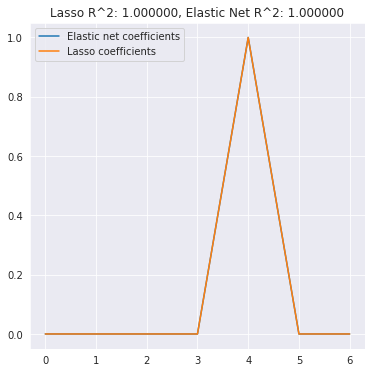

In [ ]:

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

###############################################################################
# ElasticNet
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

plt.plot(enet.coef_, label='Elastic net coefficients')
plt.plot(lasso.coef_, label='Lasso coefficients')
plt.legend(loc='best')
plt.title("Lasso R^2: %f, Elastic Net R^2: %f"
          % (r2_score_lasso, r2_score_enet))
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

MSE: 4.6791


Text(0, 0.5, 'Deviance')

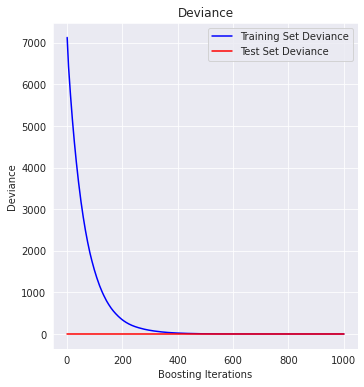

In [ ]:
from sklearn import ensemble
###############################################################################
# Fit regression model
params = {'n_estimators': 1000, 'max_depth': 20, 'min_samples_split': 17, 'max_features': 1.0,
          'learning_rate': 0.01, 'loss': 'huber'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

###############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')



MSE: 3.9635


Text(0, 0.5, 'Deviance')

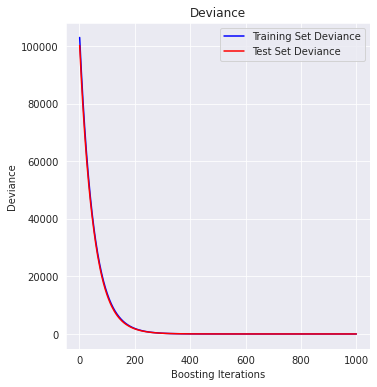

In [ ]:
from sklearn import ensemble
###############################################################################
# Fit regression model
params = {'n_estimators': 1000, 'max_depth': 20, 'min_samples_split': 17, 'max_features': 1.0,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

###############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')



In [ ]:
clf.predict(X_test)

array([153.99973725, 130.00080633, 219.99699199, ...,  90.00253899,
        90.00253899,  57.00395615])

In [ ]:
y_test


array([154., 130., 220., ...,  90.,  90.,  57.], dtype=float32)

MSE: 82.4156


Text(0, 0.5, 'Deviance')

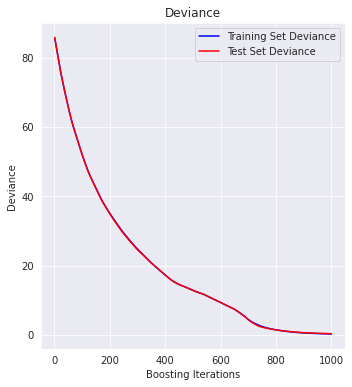

In [ ]:
from sklearn import ensemble
###############################################################################
# Fit regression model
params = {'n_estimators': 1000, 'max_depth': 20, 'min_samples_split': 17, 'max_features': 1.0,
          'learning_rate': 0.01, 'loss': 'lad'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

###############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')



MSE: 394.2382


Text(0, 0.5, 'Deviance')

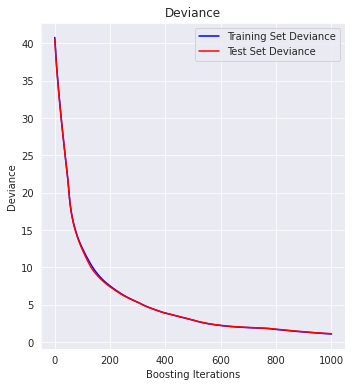

In [ ]:
from sklearn import ensemble
###############################################################################
# Fit regression model
params = {'n_estimators': 1000, 'max_depth': 20, 'min_samples_split': 17, 'max_features': 1.0,
          'learning_rate': 0.01, 'loss': 'quantile'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

###############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')



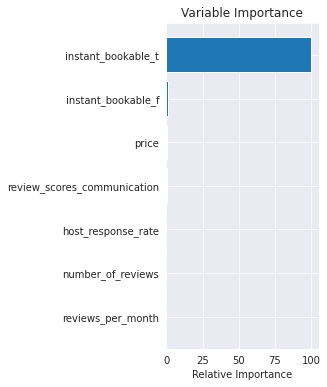

In [ ]:
###############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, names)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 394.2382
